# Red Wine Quality : Linear Regression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("/content/drive/MyDrive/20191COM00451/winequality-red (1).csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Quality check

In [8]:
round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending=False)

quality                 0.0
alcohol                 0.0
sulphates               0.0
pH                      0.0
density                 0.0
total sulfur dioxide    0.0
free sulfur dioxide     0.0
chlorides               0.0
residual sugar          0.0
citric acid             0.0
volatile acidity        0.0
fixed acidity           0.0
dtype: float64

In [9]:
round(100*(df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

1598    0.0
524     0.0
526     0.0
527     0.0
528     0.0
       ... 
1068    0.0
1069    0.0
1070    0.0
1071    0.0
0       0.0
Length: 1599, dtype: float64

No missing/Null value in either rows or columns

In [10]:
dup_df=df.copy()
dup_df.drop_duplicates(subset=None,inplace=True)

In [11]:
dup_df.shape

(1359, 12)

In [63]:
df.shape

(1599, 12)

The original dataset shape is not same after running drop duplicates. We can conclude that duplicate values exists. 

In [12]:
df=dup_df

In [13]:
for col in df:
  print(df[col].value_counts(ascending=False),"\n\n\n")

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
15.5     1
13.7     1
5.5      1
13.4     1
4.6      1
Name: fixed acidity, Length: 96, dtype: int64 



0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.090     1
1.035     1
1.580     1
0.475     1
0.805     1
Name: volatile acidity, Length: 143, dtype: int64 



0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.71      1
0.78      1
0.62      1
0.79      1
Name: citric acid, Length: 80, dtype: int64 



2.00    133
2.20    110
1.80    108
2.10    104
1.90     97
       ... 
8.10      1
8.80      1
5.70      1
2.85      1
2.65      1
Name: residual sugar, Length: 91, dtype: int64 



0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.267     1
0.043     1
0.186     1
0.222     1
0.125     1
Name: chlorides, Length: 153, dtype: int64 



6.0     121
5.0      88
15.0     65
12.0     64
10.0     63
7.0      61
9.0      55
16.0     53
17.0 

We can observe that there are no unknown values

Data Split

In [14]:
df.shape

(1359, 12)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [15]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train,X_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 31 to 926
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         951 non-null    float64
 1   volatile acidity      951 non-null    float64
 2   citric acid           951 non-null    float64
 3   residual sugar        951 non-null    float64
 4   chlorides             951 non-null    float64
 5   free sulfur dioxide   951 non-null    float64
 6   total sulfur dioxide  951 non-null    float64
 7   density               951 non-null    float64
 8   pH                    951 non-null    float64
 9   sulphates             951 non-null    float64
 10  alcohol               951 non-null    float64
 11  quality               951 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 96.6 KB


In [70]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 1573 to 677
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         408 non-null    float64
 1   volatile acidity      408 non-null    float64
 2   citric acid           408 non-null    float64
 3   residual sugar        408 non-null    float64
 4   chlorides             408 non-null    float64
 5   free sulfur dioxide   408 non-null    float64
 6   total sulfur dioxide  408 non-null    float64
 7   density               408 non-null    float64
 8   pH                    408 non-null    float64
 9   sulphates             408 non-null    float64
 10  alcohol               408 non-null    float64
 11  quality               408 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 41.4 KB


In [71]:
X_train.shape

(951, 12)

**EDA**

In [72]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

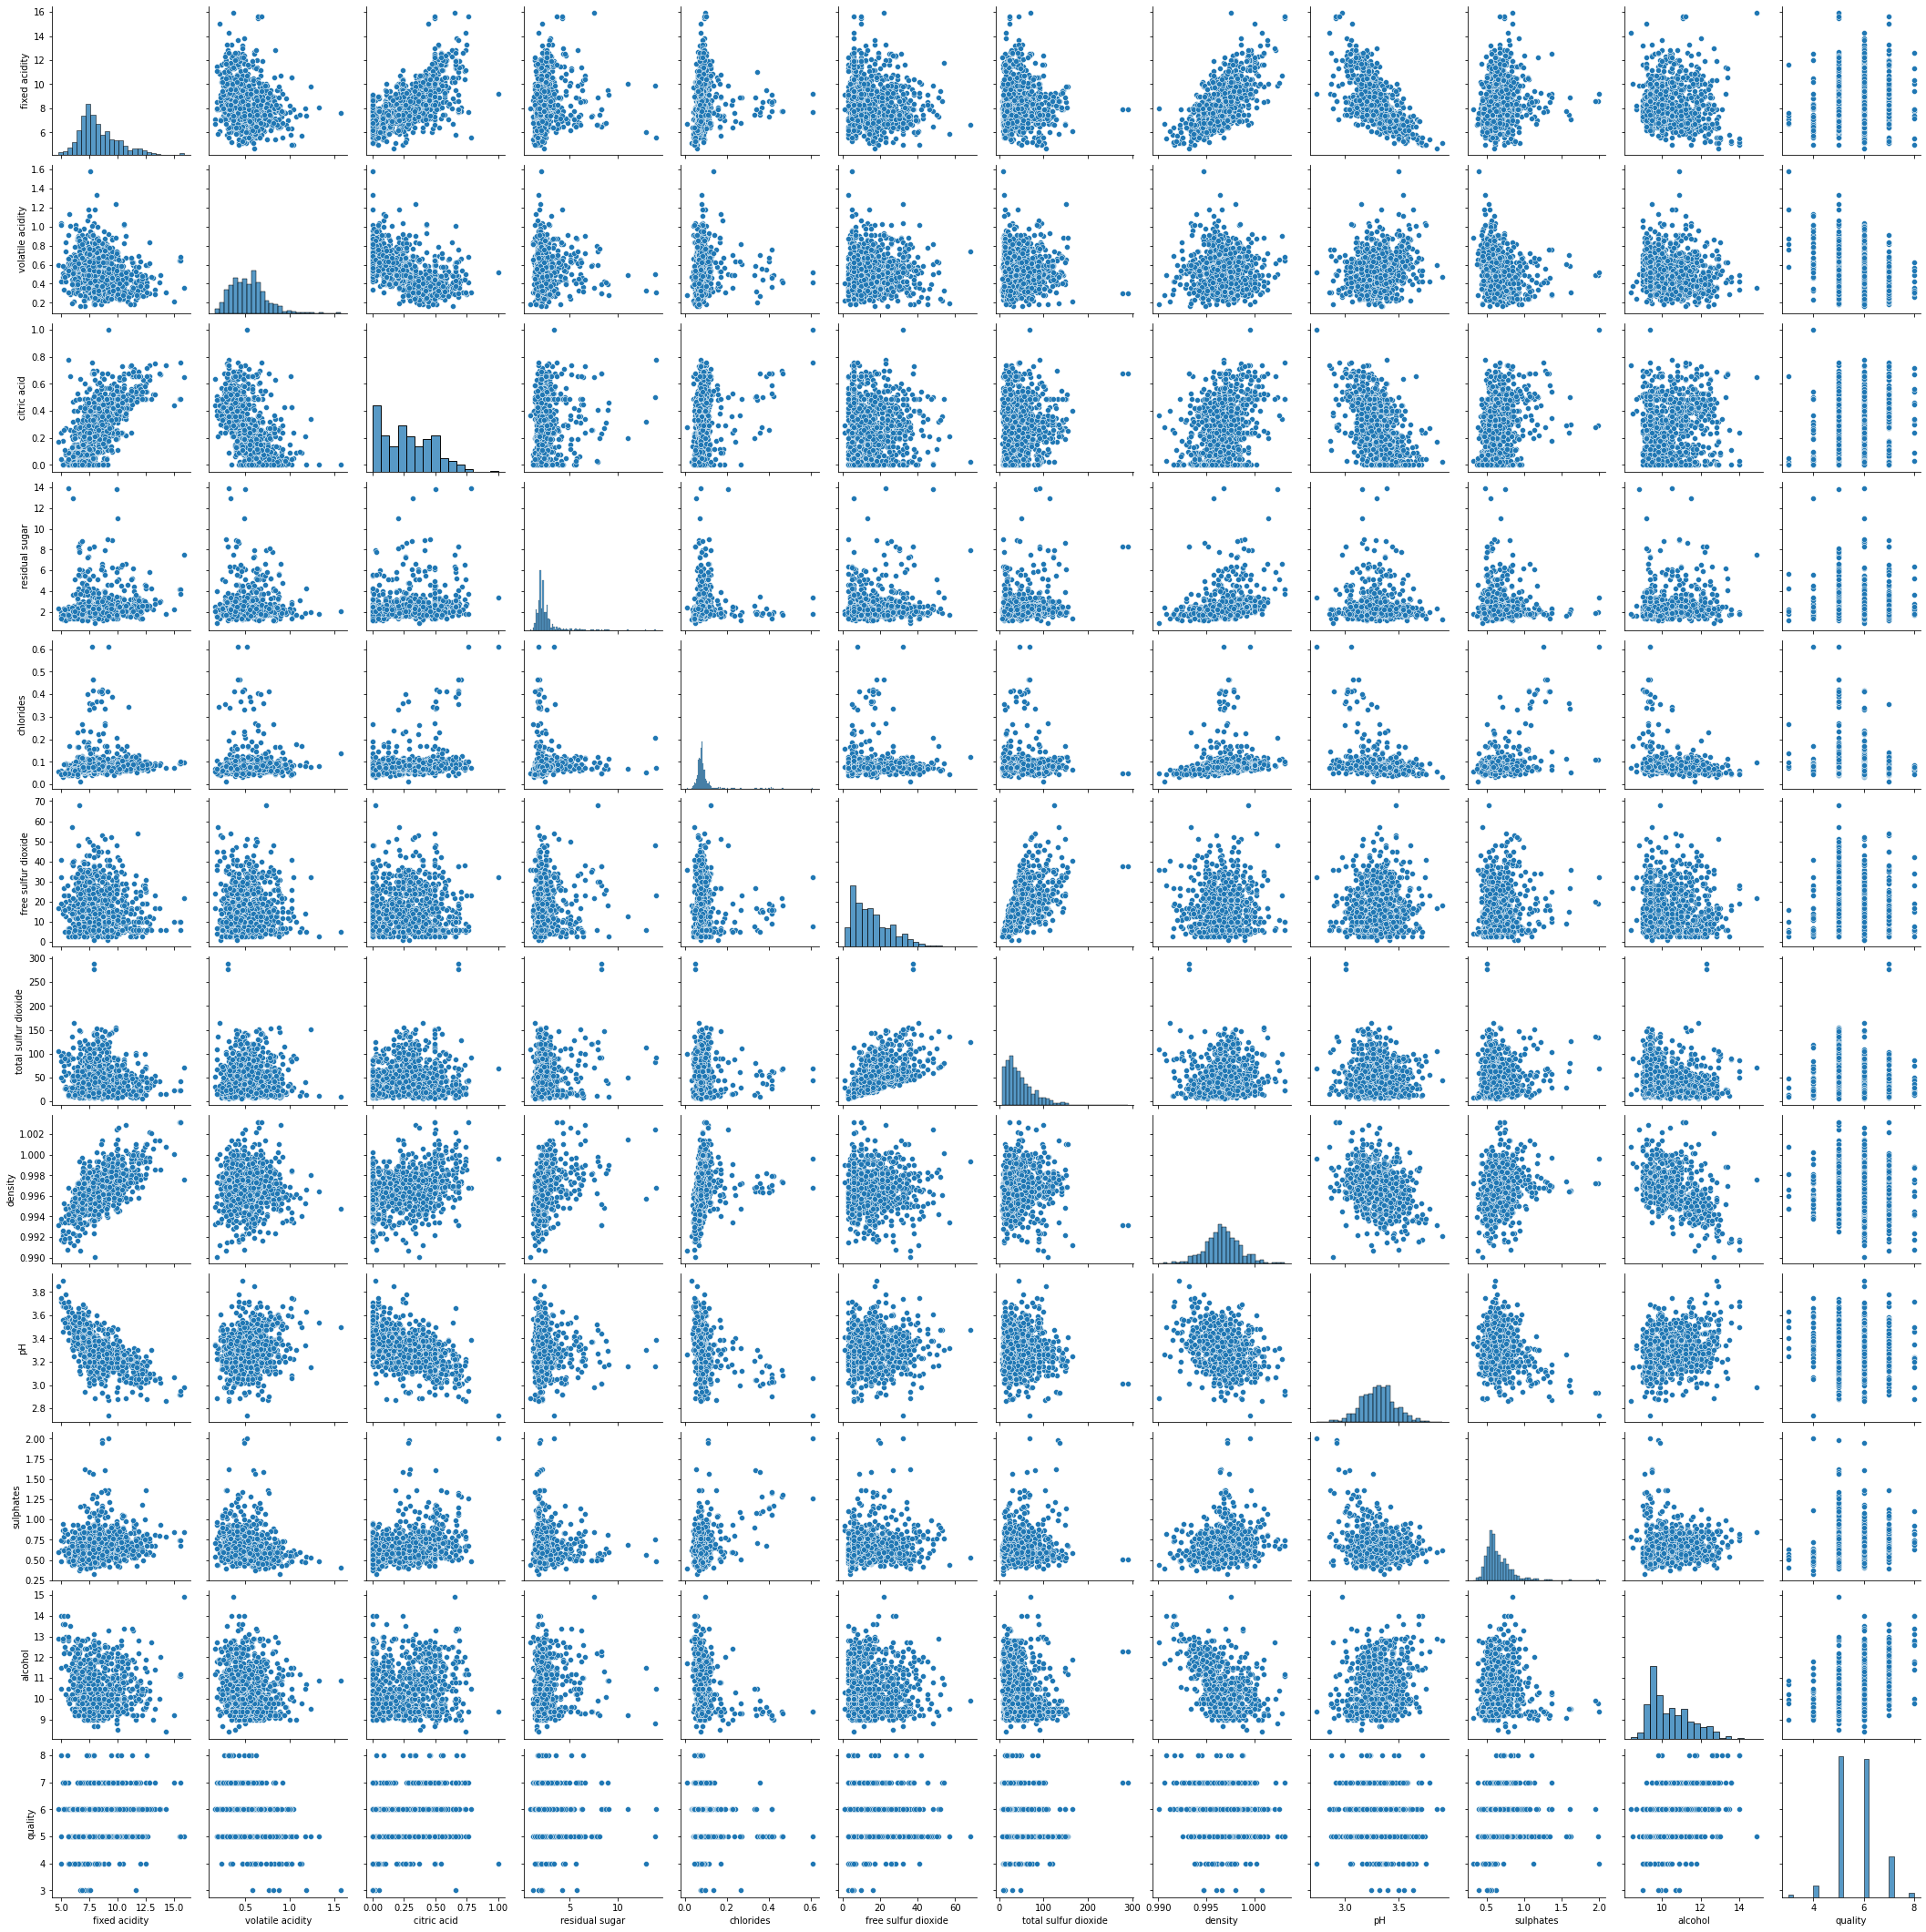

In [30]:
sns.pairplot(X_train)
plt.show()

Correlation Matrix

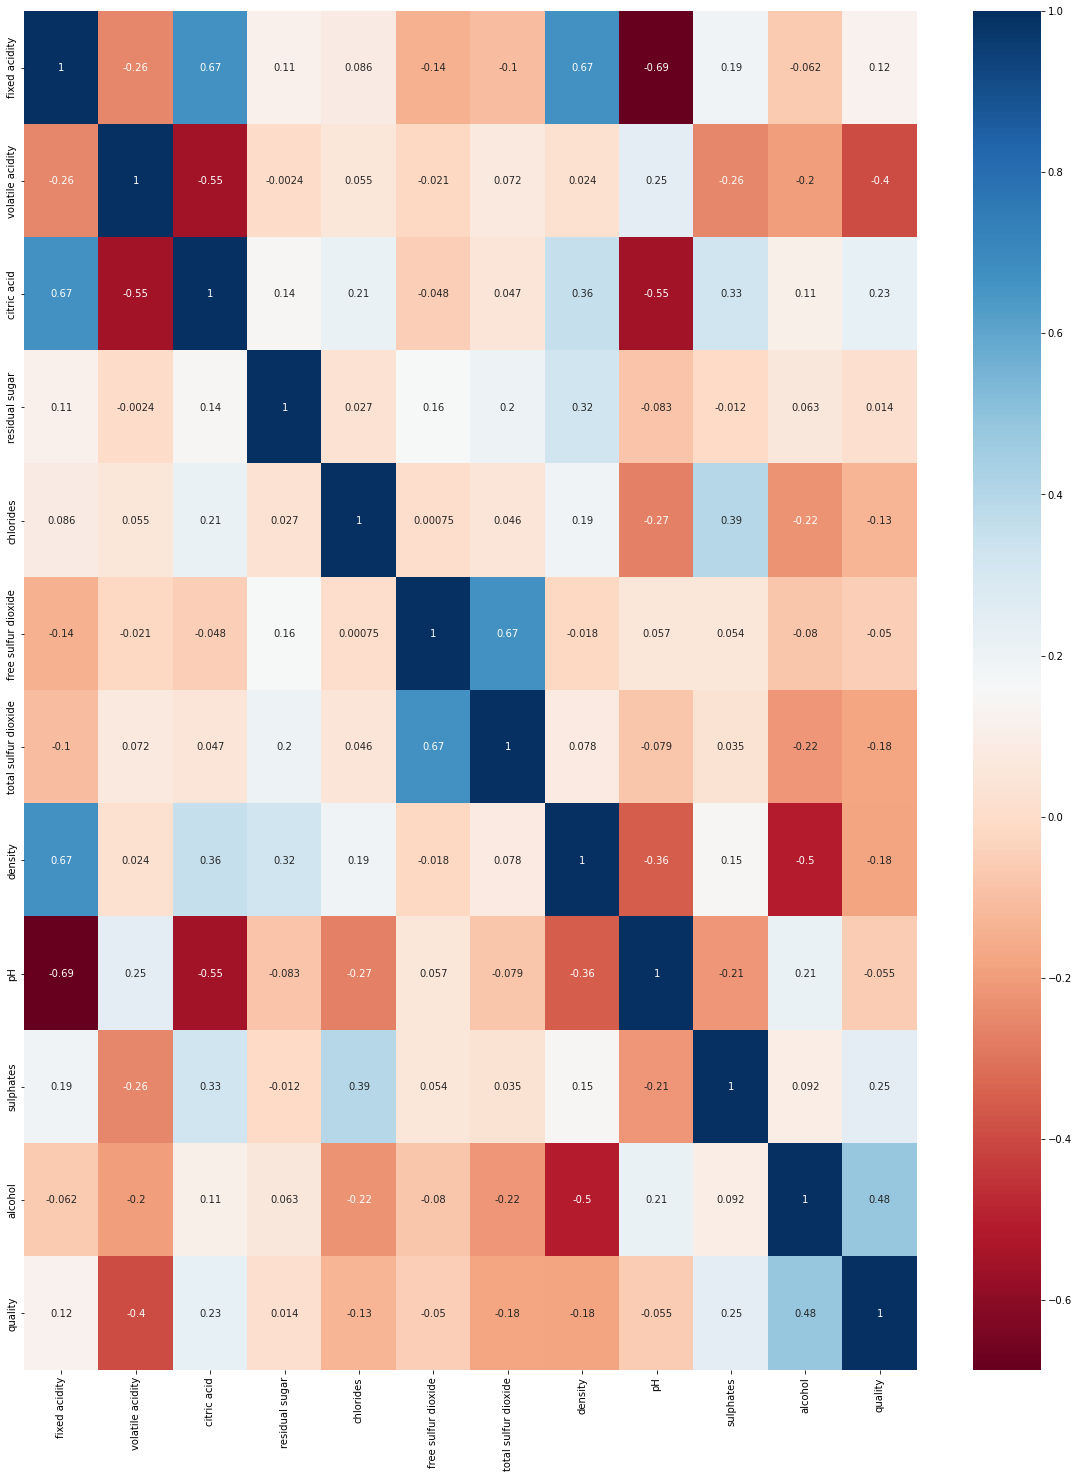

In [73]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.show()

Rescaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler()

In [18]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
371,7.9,0.240,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6
952,8.2,0.310,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2,7
1037,7.3,0.910,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,5
1398,7.0,0.600,0.12,2.2,0.083,13.0,28.0,0.99660,3.52,0.62,10.2,7


In [79]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
X_train[:]=scaler.fit_transform(X_train[:])

In [20]:
y_train=X_train.pop('quality')

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,9)
rfe=rfe.fit(X_train,y_train)

In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fixed acidity', False, 3),
 ('volatile acidity', True, 1),
 ('citric acid', False, 2),
 ('residual sugar', True, 1),
 ('chlorides', True, 1),
 ('free sulfur dioxide', True, 1),
 ('total sulfur dioxide', True, 1),
 ('density', True, 1),
 ('pH', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [24]:
col=X_train.columns[rfe.support_]
col

Index(['volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [25]:
X_train.columns[~rfe.support_]

Index(['fixed acidity', 'citric acid'], dtype='object')

In [26]:
X_train_rfe=X_train[col]

Build linear model

Model 1

VIF check

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,pH,12.95
5,density,11.41
7,sulphates,6.36
0,volatile acidity,6.00
3,free sulfur dioxide,5.81
8,alcohol,5.48
4,total sulfur dioxide,4.90
2,chlorides,4.05
1,residual sugar,3.29


In [28]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [29]:
lr1.params

const                   0.511514
volatile acidity       -0.293889
residual sugar         -0.023075
chlorides              -0.226907
free sulfur dioxide     0.047656
total sulfur dioxide   -0.170749
density                 0.030913
pH                     -0.103709
sulphates               0.251518
alcohol                 0.400770
dtype: float64

In [30]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     59.68
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           3.04e-86
Time:                        13:39:55   Log-Likelihood:                 598.76
No. Observations:                 951   AIC:                            -1178.
Df Residuals:                     941   BIC:                            -1129.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5115 

Model 2

In [31]:
X_train_new = X_train_rfe.drop(["residual sugar"], axis = 1)

VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,pH,12.67
4,density,9.23
6,sulphates,6.18
0,volatile acidity,6.00
2,free sulfur dioxide,5.79
7,alcohol,4.91
3,total sulfur dioxide,4.69
1,chlorides,4.05


In [33]:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [34]:
lr2.params

const                   0.515094
volatile acidity       -0.294184
chlorides              -0.228533
free sulfur dioxide     0.048307
total sulfur dioxide   -0.176385
density                 0.022517
pH                     -0.103767
sulphates               0.254962
alcohol                 0.394663
dtype: float64

In [35]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     67.17
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           4.01e-87
Time:                        13:45:43   Log-Likelihood:                 598.65
No. Observations:                 951   AIC:                            -1179.
Df Residuals:                     942   BIC:                            -1136.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5151 

Model 3

In [36]:
X_train_new = X_train_new.drop(["density"], axis = 1)

VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,pH,11.18
2,free sulfur dioxide,5.79
0,volatile acidity,5.65
5,sulphates,5.45
6,alcohol,4.86
3,total sulfur dioxide,4.61
1,chlorides,3.92


In [39]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [40]:
lr3.params

const                   0.531342
volatile acidity       -0.293331
chlorides              -0.231169
free sulfur dioxide     0.047447
total sulfur dioxide   -0.176987
pH                     -0.109317
sulphates               0.260287
alcohol                 0.385557
dtype: float64

In [41]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     76.76
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           5.35e-88
Time:                        13:48:55   Log-Likelihood:                 598.45
No. Observations:                 951   AIC:                            -1181.
Df Residuals:                     943   BIC:                            -1142.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5313 

Model 4

In [42]:
X_train_new = X_train_new.drop(["free sulfur dioxide"], axis = 1)

VIF

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,pH,10.49
0,volatile acidity,5.60
4,sulphates,5.40
5,alcohol,4.85
1,chlorides,3.92
2,total sulfur dioxide,2.40


In [45]:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [46]:
lr4.params

const                   0.532696
volatile acidity       -0.298182
chlorides              -0.233059
total sulfur dioxide   -0.134921
pH                     -0.101701
sulphates               0.264435
alcohol                 0.386312
dtype: float64

In [47]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     89.21
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           1.24e-88
Time:                        13:51:12   Log-Likelihood:                 597.61
No. Observations:                 951   AIC:                            -1181.
Df Residuals:                     944   BIC:                            -1147.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5327 

Model  5

In [48]:
X_train_new = X_train_new.drop(["pH"], axis = 1)

VIF

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,sulphates,5.22
1,chlorides,3.92
0,volatile acidity,3.43
4,alcohol,3.24
2,total sulfur dioxide,2.32


In [50]:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [51]:
lr5.params

const                   0.488353
volatile acidity       -0.327050
chlorides              -0.198607
total sulfur dioxide   -0.127851
sulphates               0.272666
alcohol                 0.370526
dtype: float64

In [52]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     104.5
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           7.67e-88
Time:                        13:53:03   Log-Likelihood:                 593.35
No. Observations:                 951   AIC:                            -1175.
Df Residuals:                     945   BIC:                            -1146.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4884 

Model 6

In [53]:
X_train_new = X_train_new.drop(["sulphates"], axis = 1)

VIF

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,volatile acidity,3.41
3,alcohol,2.49
1,chlorides,2.48
2,total sulfur dioxide,2.19


In [56]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [57]:
lr6.params

const                   0.527163
volatile acidity       -0.382459
chlorides              -0.043191
total sulfur dioxide   -0.108409
alcohol                 0.393210
dtype: float64

In [58]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     117.1
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           3.65e-81
Time:                        13:55:07   Log-Likelihood:                 575.30
No. Observations:                 951   AIC:                            -1141.
Df Residuals:                     946   BIC:                            -1116.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5272 

Model 7

In [59]:
X_train_new = X_train_new.drop(["chlorides"], axis = 1)

VIF

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,volatile acidity,2.91
2,alcohol,2.39
1,total sulfur dioxide,2.08


In [61]:
X_train_lm7 = sm.add_constant(X_train_new)
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [62]:
lr7.params

const                   0.519771
volatile acidity       -0.382410
total sulfur dioxide   -0.107978
alcohol                 0.398673
dtype: float64

In [63]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           4.01e-82
Time:                        13:57:25   Log-Likelihood:                 574.90
No. Observations:                 951   AIC:                            -1142.
Df Residuals:                     947   BIC:                            -1122.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5198 

Model 8

In [64]:
X_train_new = X_train_new.drop(["total sulfur dioxide"], axis = 1)

VIF

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,volatile acidity,2.29
1,alcohol,2.29


In [66]:
X_train_lm8 = sm.add_constant(X_train_new)
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [67]:
lr8.params

const               0.499022
volatile acidity   -0.382834
alcohol             0.414775
dtype: float64

In [68]:
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     227.8
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           1.68e-81
Time:                        13:58:53   Log-Likelihood:                 570.60
No. Observations:                 951   AIC:                            -1135.
Df Residuals:                     948   BIC:                            -1121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4990      0.014  

# **Final Model Interpretation**

Hypothesis Testing:
Hypothesis testing states that:

H0:B1=B2=...=Bn=0 H1: at least one Bi!=0

lr8 model coefficient values

*   const 0.4990
*   volatile acidity -0.3828
*   alcohol 0.4148





# **F Statistics**
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 227.8 Prob (F-statistic): 1.68e-81 The F-Statistics value of 227.8 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

**The equation of best fitted surface based on model lr8:**
quality = 0.4990 - (volatile acidity × 0.3828) + (alcohol × 0.4148 )

# **Interpretation of Coefficients:**
volatile acidity: A coefficient value of ‘0.3838’ indicated that a unit decrease in volatite acidity variable, increases the quality numbers by 0.3828 units.

alcohol: A coefficient value of ‘0.4148’ indicated that a unit increase in alcohol variable, increases the quality numbers by 0.4148 units.

# **ASSUMPTIONS**

**Error terms are normally distributed with mean zero (not X, Y)**

Residual Analysis Of Training Data

In [69]:
y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

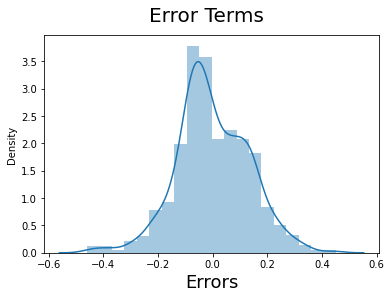

In [70]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

**There is a linear relationship between X and Y**

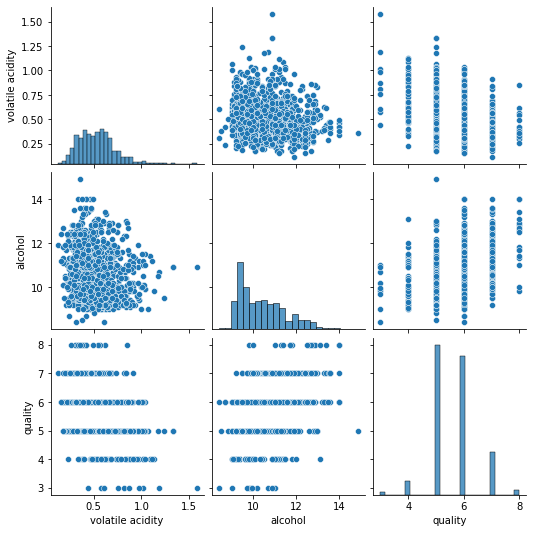

In [72]:
wine_num=df[[ 'volatile acidity', 'alcohol', 'quality']]

sns.pairplot(wine_num)
plt.show()

**There is No Multicollinearity between the predictor variables**

In [73]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,volatile acidity,2.29
1,alcohol,2.29


**MAKING PREDICTION USING FINAL MODEL**

Applying the scaling on the test sets

In [76]:
X_test[:]=scaler.fit_transform(X_test[:])

In [77]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1573,0.148936,0.380165,0.253165,0.083916,0.098143,0.185714,0.281046,0.331357,0.582524,0.370370,0.732143,0.6
413,0.563830,0.231405,0.670886,0.384615,0.156499,0.057143,0.078431,0.622683,0.281553,0.555556,0.589286,0.8
1540,0.170213,0.330579,0.101266,0.223776,0.087533,0.128571,0.163399,0.464047,0.563107,0.320988,0.571429,0.6
1038,0.436170,0.239669,0.518987,0.349650,0.106101,0.328571,0.228758,0.378058,0.252427,0.493827,0.750000,0.8
852,0.361702,0.247934,0.405063,0.090909,0.111406,0.342857,0.751634,0.578947,0.233010,0.864198,0.232143,0.4


In [79]:
X_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,0.393747,0.335278,0.334016,0.093866,0.122373,0.186887,0.249800,0.485143,0.328027,0.342683,0.365335,0.516176
std,0.184653,0.147134,0.237979,0.102301,0.087390,0.148577,0.212854,0.139237,0.148936,0.166481,0.198185,0.171518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265957,0.223140,0.113924,0.048951,0.082228,0.071429,0.091503,0.399926,0.233010,0.222222,0.196429,0.400000
50%,0.351064,0.330579,0.316456,0.069930,0.106101,0.157143,0.186275,0.489251,0.320388,0.308642,0.321429,0.500000
75%,0.489362,0.429752,0.531646,0.097902,0.137931,0.257143,0.346405,0.565048,0.410194,0.419753,0.482143,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [82]:
y_test = X_test.pop('quality')
X_test = X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 1573 to 677
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         408 non-null    float64
 1   volatile acidity      408 non-null    float64
 2   citric acid           408 non-null    float64
 3   residual sugar        408 non-null    float64
 4   chlorides             408 non-null    float64
 5   free sulfur dioxide   408 non-null    float64
 6   total sulfur dioxide  408 non-null    float64
 7   density               408 non-null    float64
 8   pH                    408 non-null    float64
 9   sulphates             408 non-null    float64
 10  alcohol               408 non-null    float64
dtypes: float64(11)
memory usage: 38.2 KB


In [84]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 1573 to 677
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             408 non-null    float64
 1   volatile acidity  408 non-null    float64
 2   alcohol           408 non-null    float64
dtypes: float64(3)
memory usage: 12.8 KB


In [85]:
y_pred = lr8.predict(X_test_lm8)

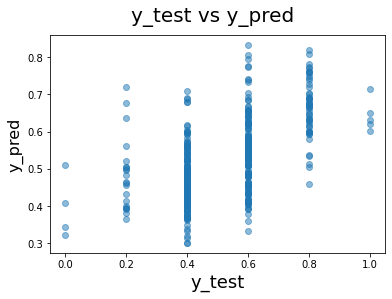

In [86]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [87]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
1573,0.6,0.66
413,0.8,0.65
1540,0.6,0.61
1038,0.8,0.72
852,0.4,0.50


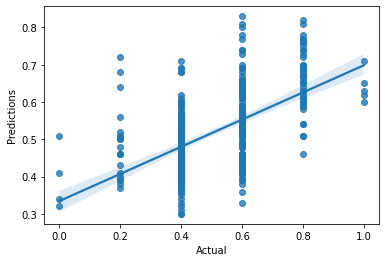

In [88]:
sns.regplot('Actual','Predictions',data=df)

R^2 Value for TEST

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.322640891507851

Adjusted R^2 Value for TEST

In [91]:
r2=0.32264089150785114
X_test.shape

(408, 2)

In [92]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.31929590825603815

**Final Result Comparison**

Train R^2 :0.325

Train Adjusted R^2 :0.323

Test R^2 :0.322

Test Adjusted R^2 :0.319





**Evaluating Model Performance:**

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

Mean Squared Error (MSE) is the mean of the squared errors.

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [93]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.1075444456145748
MSE: 0.0198778921190938
RMSE: 0.14098897871498253


We want the value of RMSE to be as low as possible, as lower the RMSE value is, the better the model is with its predictions